In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Đồ án/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [4]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape of the data frame: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [3]:
df = df.drop("Time", axis = 1)

In [4]:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).T

,V1,V2,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V16,V15,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,Class
Total,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

print("==============================================")

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %
 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

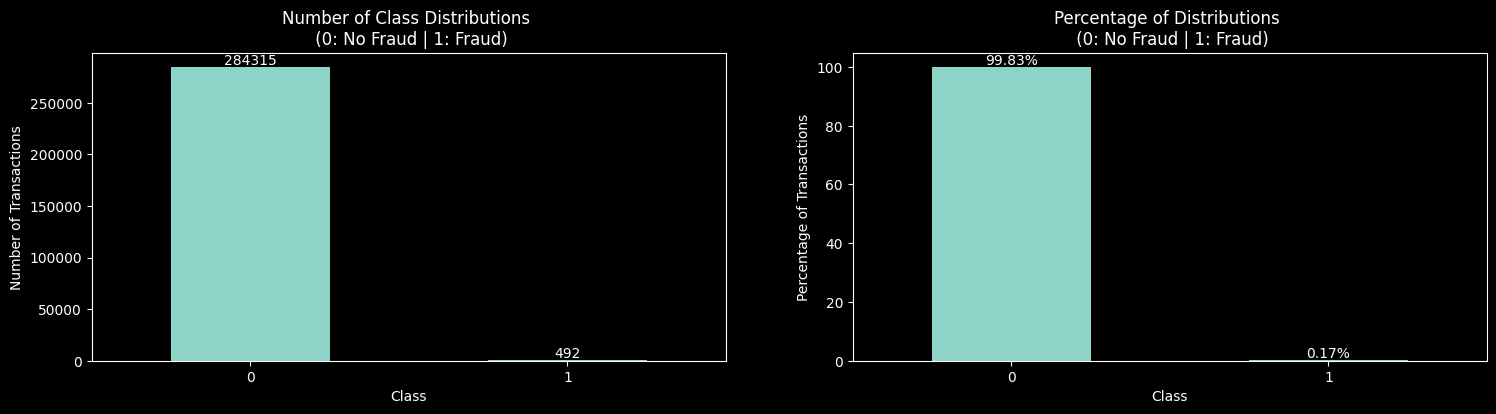

In [9]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

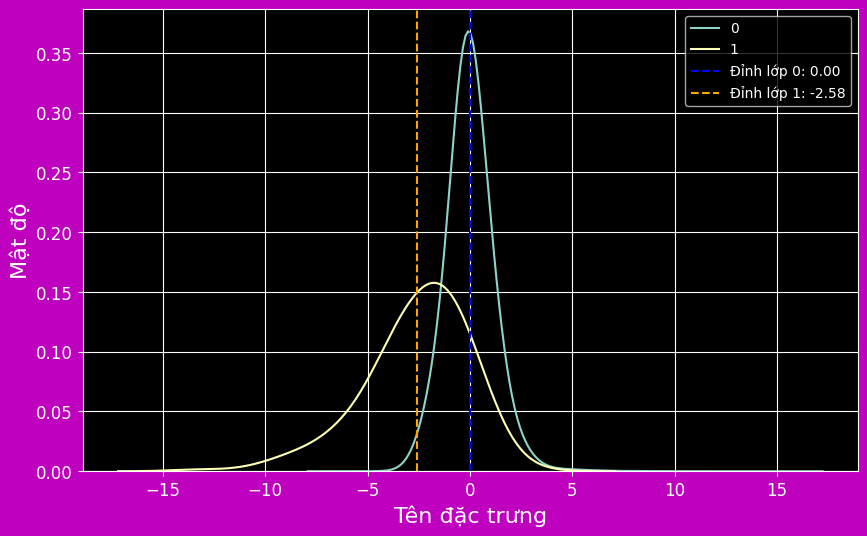

In [10]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

# Specify the feature you want to plot
feature_to_plot = "V9"  # Thay "your_feature_name" bằng tên feature bạn muốn vẽ

with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 6), facecolor='m')
    
    kde_t0 = sns.kdeplot(t0[feature_to_plot], bw=0.5, label="0")
    kde_t1 = sns.kdeplot(t1[feature_to_plot], bw=0.5, label="1")
    
    # Tìm giá trị đỉnh của mỗi lớp
    peak_t0 = t0[feature_to_plot].mean()
    peak_t1 = t1[feature_to_plot].mean()
    
    # Vẽ đường thẳng đứng tại vị trí đỉnh
    plt.axvline(peak_t0, color='blue', linestyle='--', label=f"Đỉnh lớp 0: {peak_t0:.2f}")
    plt.axvline(peak_t1, color='orange', linestyle='--', label=f"Đỉnh lớp 1: {peak_t1:.2f}")
    
    plt.xlabel("Tên đặc trưng", fontsize=16)
    plt.ylabel("Mật độ", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
    plt.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

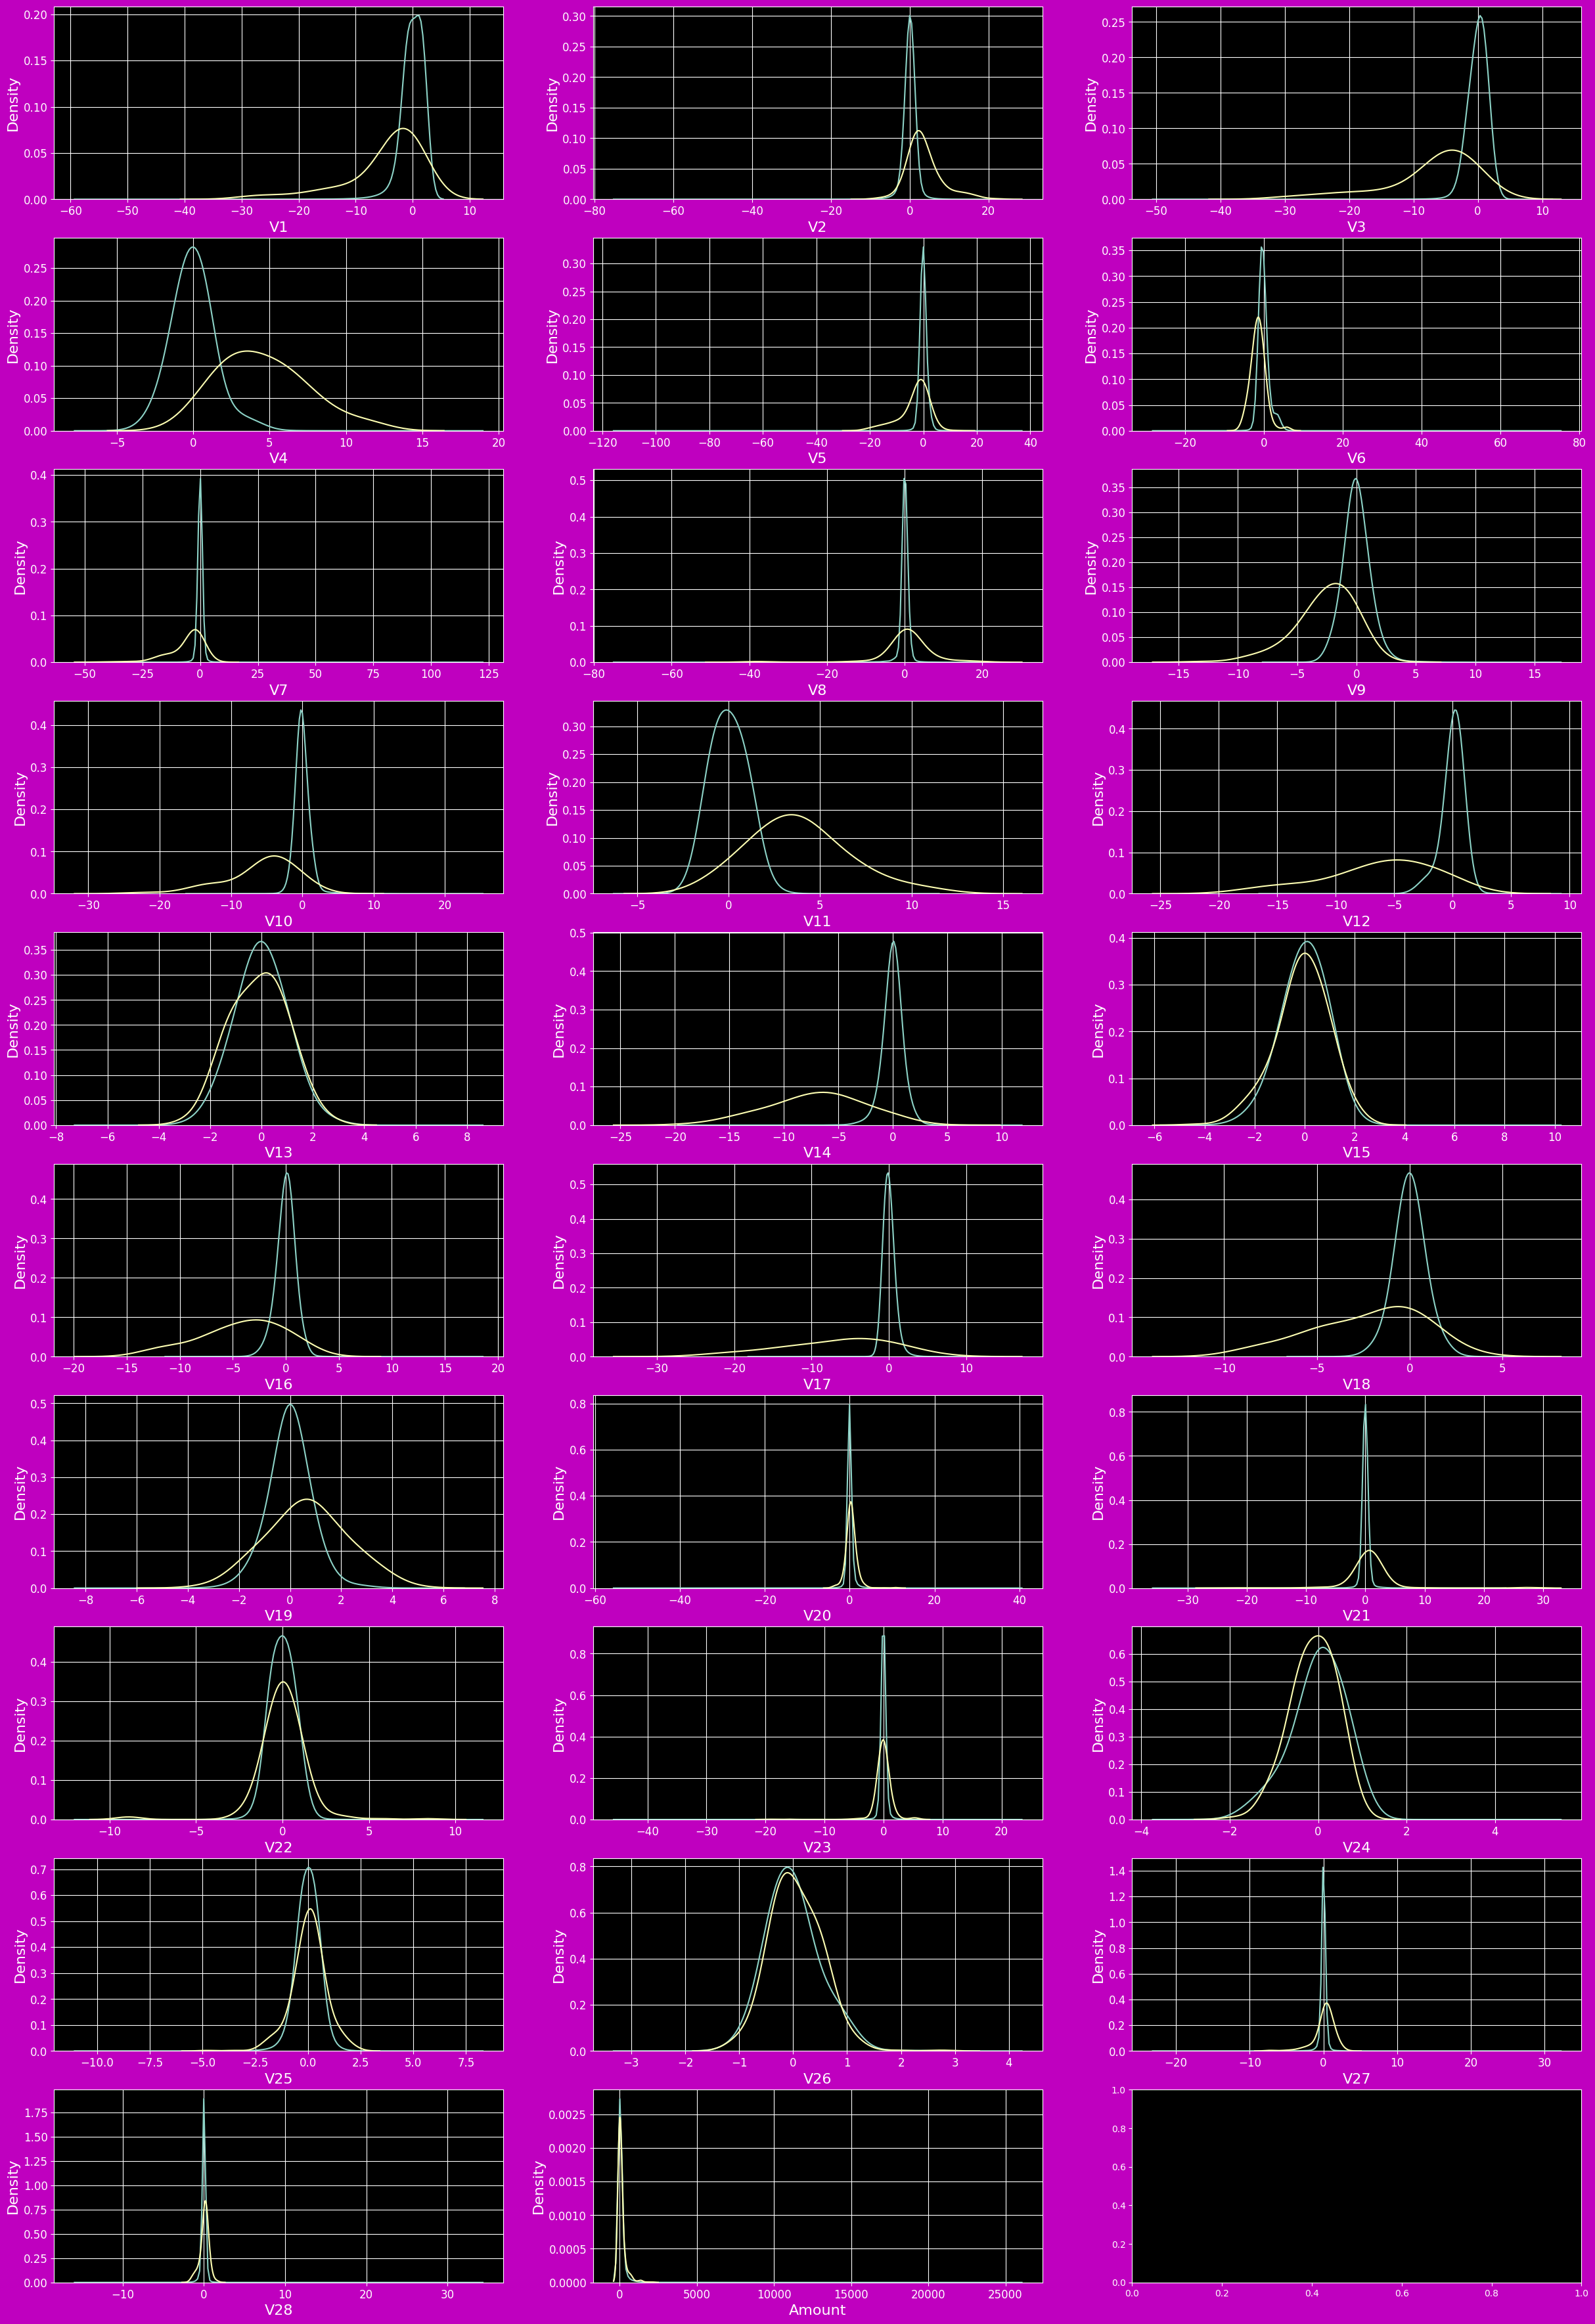

In [11]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

In [6]:

y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [14]:
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [8]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [9]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [10]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [11]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


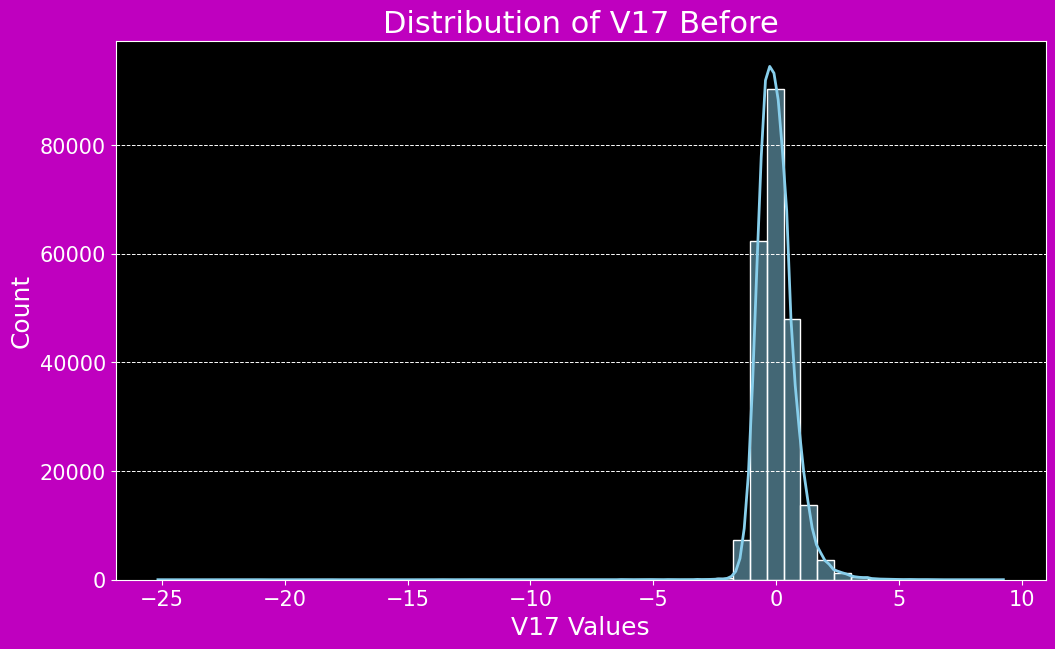

In [49]:


# Select the feature column you want to visualize (e.g., 'V1')
feature_column = X_train.columns[16]  # You can change the index to select a different column

# Set the plot style to a dark background for better contrast
with plt.style.context('dark_background'):
    # Create the figure with a specific size and background color
    plt.figure(figsize=(12, 7), facecolor='m')  # Larger figure size
    
    # Plot the histogram of the selected feature column with customized bins and a KDE line
    sns.histplot(X_train[feature_column], kde=True, bins=50, color='skyblue', line_kws={'color': 'red', 'lw': 2})
    
    # Set the title of the plot to the feature column name
    plt.title(f'Distribution of {feature_column} Before', fontsize=22)
    
    # Set the y-axis label to "Count" (number of occurrences)
    plt.ylabel("Count", fontsize=18)
    
    # Set the x-axis label (left empty as it's the feature name)
    plt.xlabel(f'{feature_column} Values', fontsize=18)
    
    # Adjust the size of the ticks on both axes for better readability
    plt.tick_params(axis='both', labelsize=15)
    
    # Add grid lines for easier reading of the graph
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    
    # Display the plot
    plt.show()


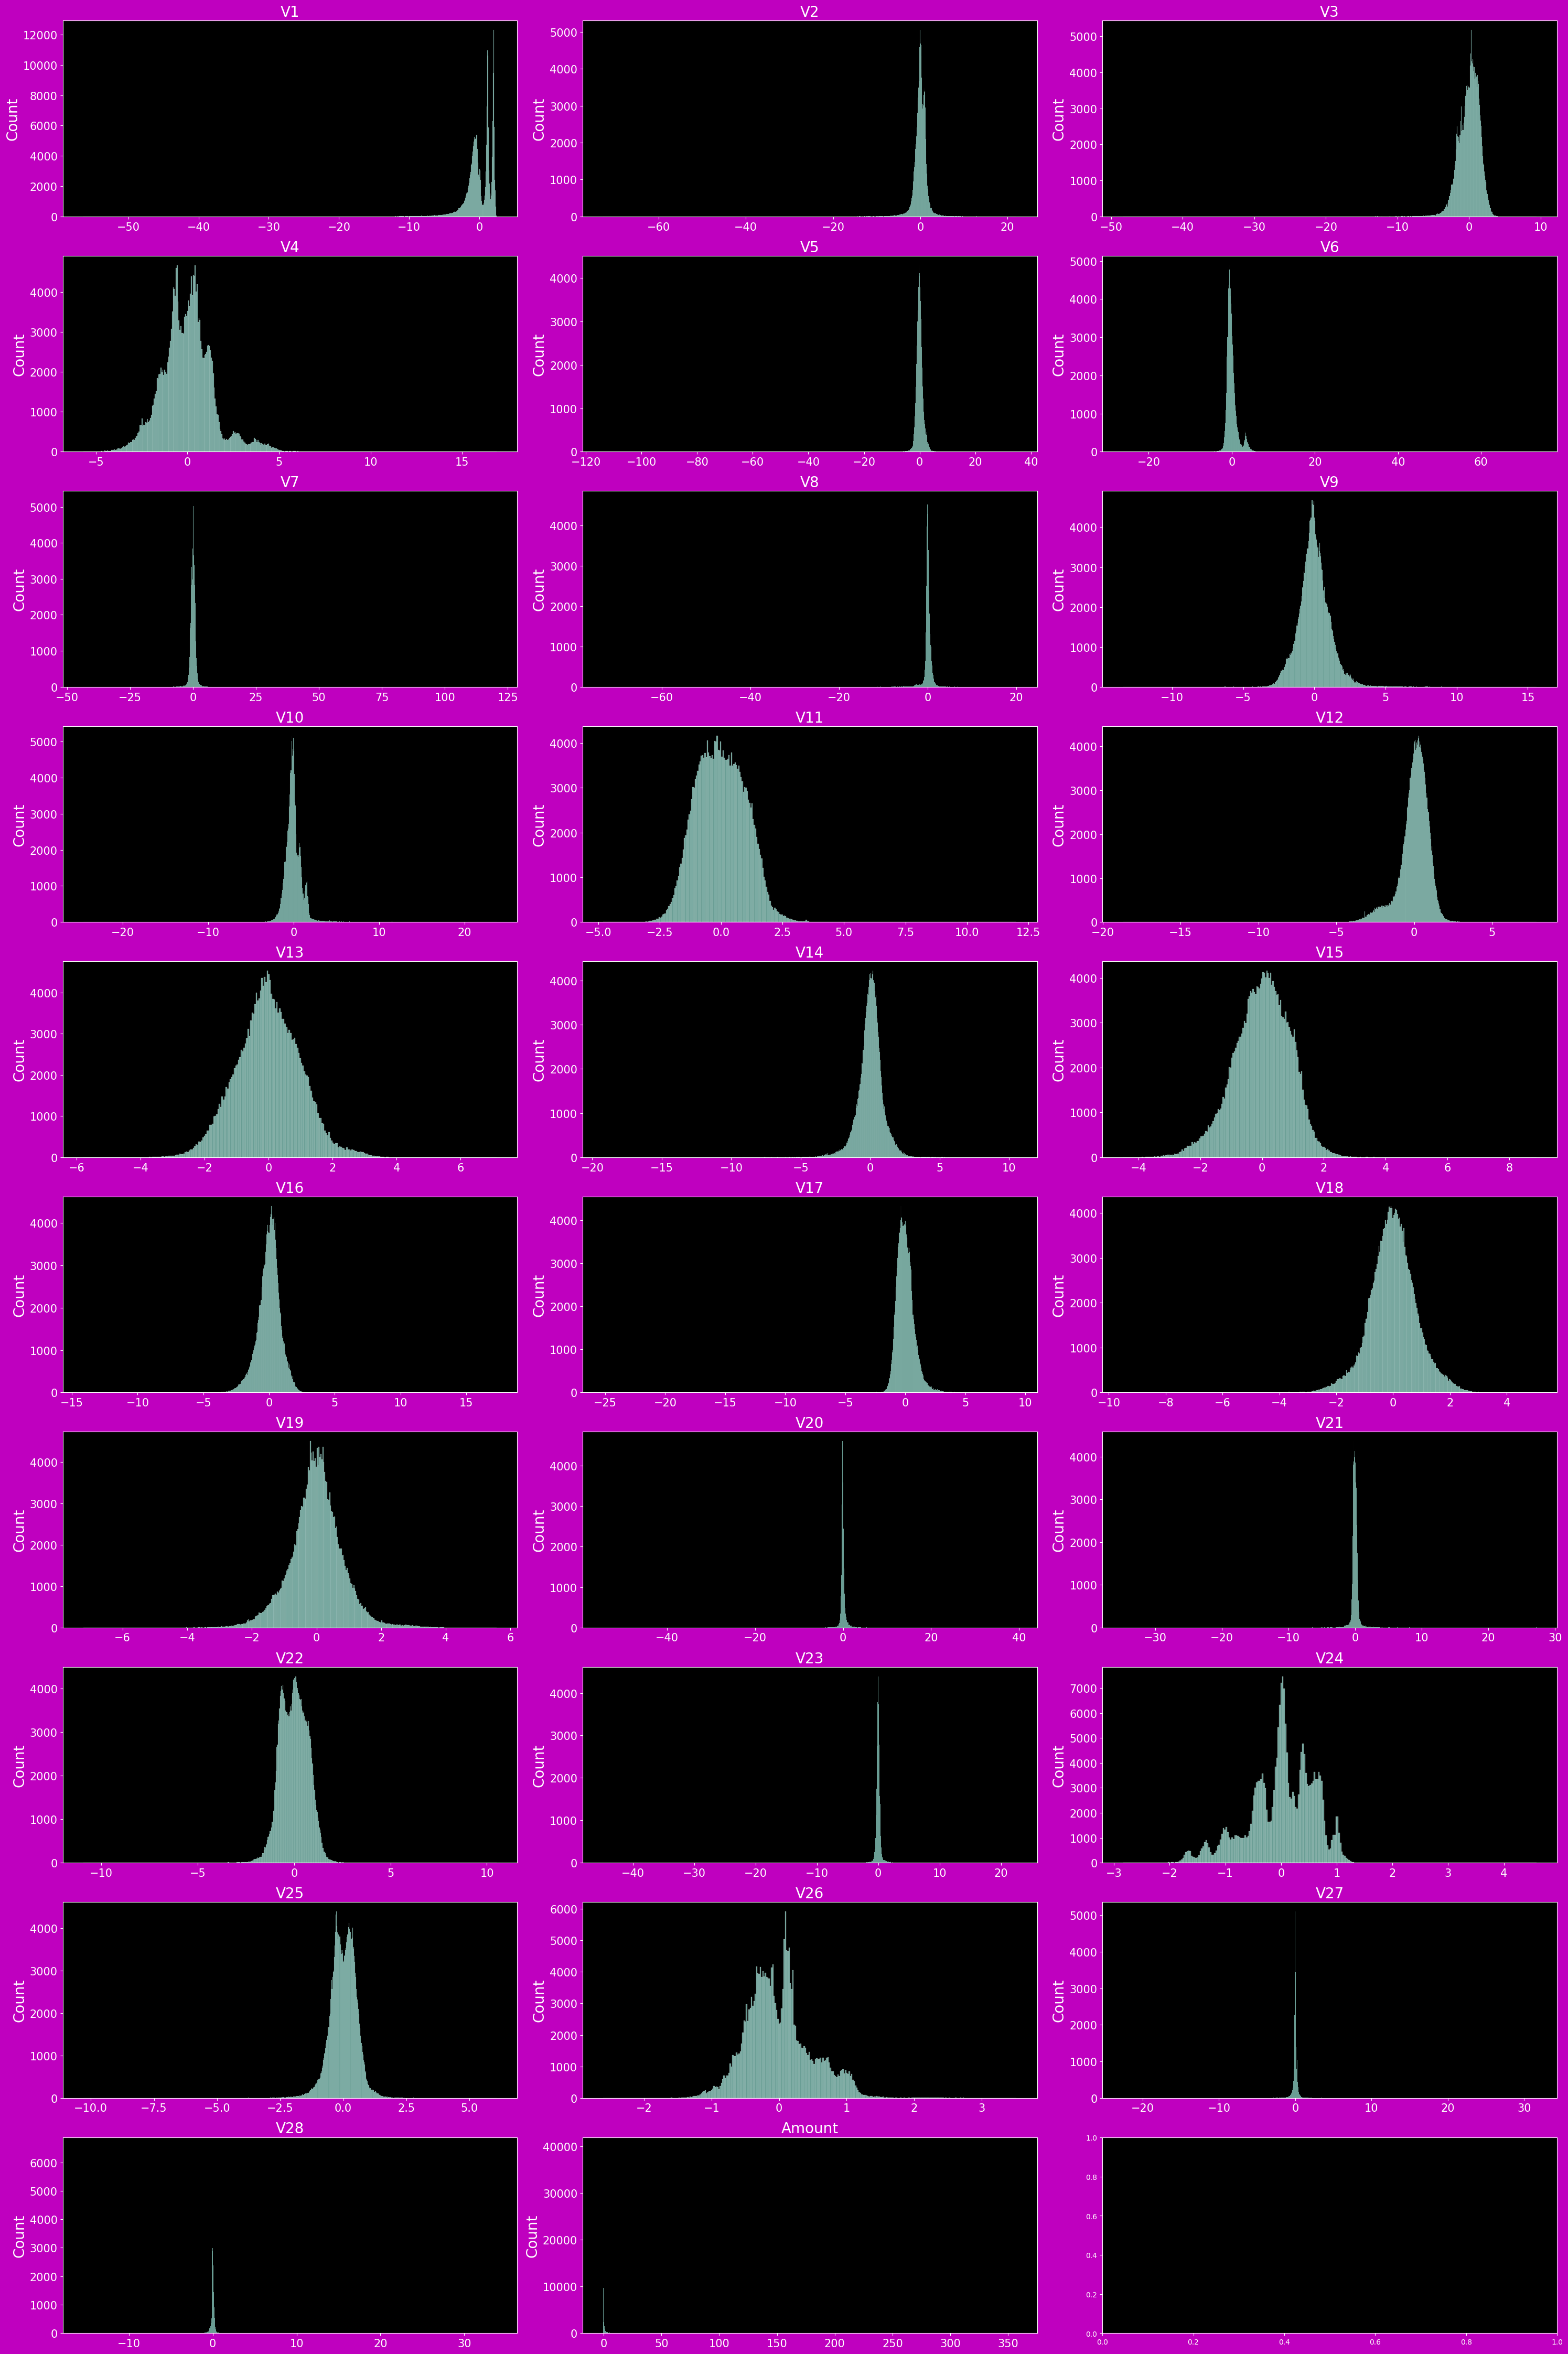

In [20]:
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

In [12]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.306334,-4.779484,-2.247962,0.687574,-2.786851,1.937381,3.152665,-8.639485,0.541869,1.132688,0.354102,-2.286654,0.064819,-1.969112,-0.308419,-1.077909,-3.733377,-0.254948,0.106133,-1.960492,3.490183,-0.219171,-6.258558,-0.549854,-0.436292,0.574980,-0.890209,9.978409,18.193943


In [13]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [23]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,0.319897,0.584204,-0.251486,0.062302,0.013795,0.684356,-0.906442,0.739436,0.043943,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.222825
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,0.521818,0.373473,-0.533295,-0.401809,0.771781,-1.879937,1.241541,-2.623211,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,0.208629
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,-0.305690,0.445453,-0.547450,0.166727,-0.073930,-0.796913,0.404795,-1.033061,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,0.325957
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,1.708922,-1.666023,2.119731,1.799882,-0.357245,0.705997,-0.247970,0.483059,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-0.293807


In [14]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [51]:
import pandas as pd

# Giả sử X_train ban đầu là một DataFrame
X_train_pt = pd.DataFrame(X_train_pt, columns=X_train.columns)

# Nếu X_test cũng cần giữ nhãn
X_test_pt = pd.DataFrame(X_test_pt, columns=X_test.columns)

# Kiểm tra dữ liệu sau khi giữ lại nhãn
print(X_train_pt.head())


         V1        V2        V3        V4        V5        V6        V7  \
0  1.336188 -0.544845 -0.965606 -0.420795  1.098808  2.530347 -1.195983   
1  1.425774 -0.116737 -1.776576  0.252512  2.186342  2.157106 -0.000786   
2 -0.754387  0.330483  0.399881 -0.685256 -0.605729  1.414925 -1.789942   
3  1.686538 -0.960299 -0.630097 -1.249409 -1.008630 -0.179880 -1.154125   
4 -0.504203 -0.692345 -0.071695 -2.857635  0.512868 -0.008022  0.407953   

         V8        V9       V10       V11       V12       V13       V14  \
0  1.193358  1.254348 -0.106992 -0.066314  0.455748  0.072358 -0.150225   
1  0.641573  0.094536  0.304136 -0.208442  0.208679 -0.399209  0.766264   
2 -3.636030  0.053256 -2.010828 -0.343141  2.650201  0.756416  0.056656   
3 -0.068541 -1.042182  1.564049  0.137776 -0.866443 -0.463715 -0.285627   
4 -0.188334  0.011243 -0.498444 -0.204561 -0.241971 -0.784132  0.069992   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.531943  0.352829 -

In [54]:
var = X_train_pt.columns
skew_list = []
for i in var:
    skew_list.append(X_train_pt[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-0.218136,0.336876,-0.079701,0.019656,-1.349420,-2.001738,2.883669,2.382707,-0.049934,-1.329089,0.062098,0.162452,0.006358,0.101347,0.013679,0.156780,-0.805442,-0.058739,0.015386,-0.879795,-2.076984,-0.027718,-0.255033,0.113940,0.076555,-0.024692,3.731696,1.320690,0.417497


In [47]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V5', 'V6', 'V7', 'V8', 'V10', 'V21', 'V27', 'V28']

In [15]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


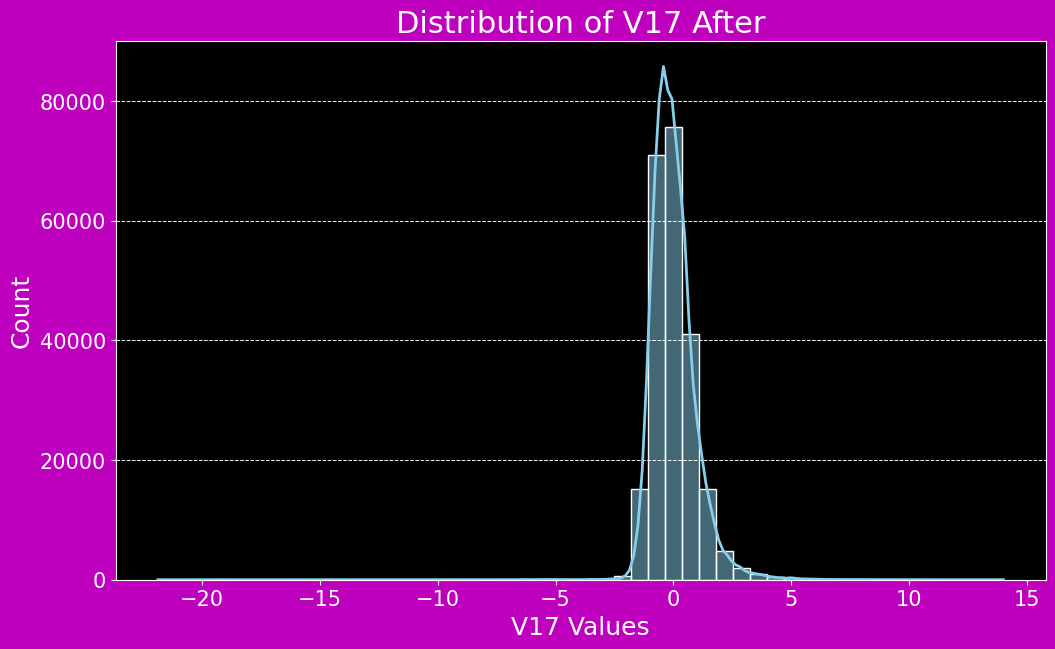

In [67]:


# Giả sử feature_column là chỉ số cột
feature_column_index = 16  # Thay đổi chỉ số này để chọn cột khác

# Trích xuất cột dựa trên chỉ số từ X_train
feature_data = X_train_pt[:, feature_column_index]

# Đặt tên cột (có thể tự định nghĩa nếu cần)
feature_column_name = f"V{feature_column_index + 1}"  # Đặt tên tùy chỉnh

# Đặt style nền tối cho đồ thị
with plt.style.context('dark_background'):
    # Tạo biểu đồ với kích thước lớn và màu nền tùy chỉnh
    plt.figure(figsize=(12, 7), facecolor='m')  # Nền màu đen

    # Vẽ biểu đồ histogram với đường KDE
    sns.histplot(feature_data, kde=True, bins=50, color='skyblue', line_kws={'color': 'red', 'lw': 2})
    
    # Đặt tiêu đề cho đồ thị
    plt.title(f'Distribution of {feature_column_name} After', fontsize=22)
    
    # Nhãn trục y
    plt.ylabel("Count", fontsize=18)
    
    # Nhãn trục x
    plt.xlabel(f'{feature_column_name} Values', fontsize=18)
    
    # Tăng kích thước chữ trên các trục
    plt.tick_params(axis='both', labelsize=15)
    
    # Thêm lưới cho trục y
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    
    # Hiển thị đồ thị
    plt.show()


In [68]:
y_train.value_counts()/y_train.shape

Class
0   0.998271
1   0.001729
Name: count, dtype: float64

In [16]:
# perfom cross validation on the X_train & y_train 
# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

In [17]:
print(X_train.columns[0])
print(X_train_pt.shape[0])
print("============================================")
print(X_train_pt[:,0])
print(y_train_pt.head())

V1
227845
[ 1.33618788  1.42577426 -0.75438698 ...  0.52096648  0.70400402
 -0.57696779]
265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64


============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.38441801071167 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.2495133876800537 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.7485151290893555 seconds
ROC-AUC Score for val data = 0.9293000893254546
Mean precision val score: 0.0
Mean recall val score: 0.0
Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.5778954029083252 seconds
Train: [     0      1      2 

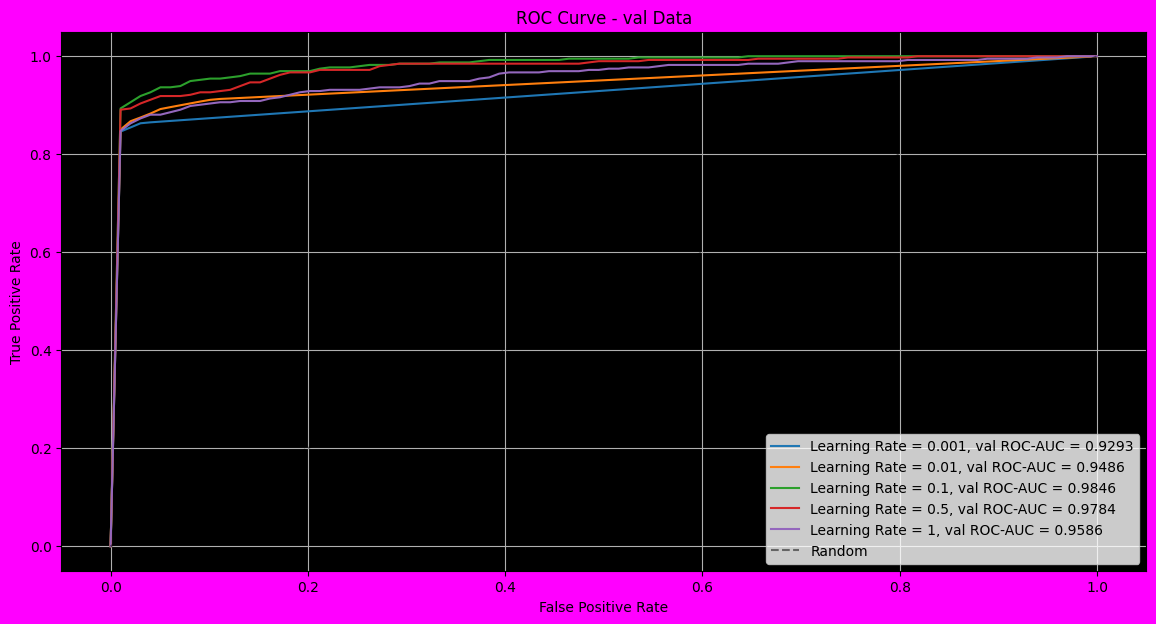

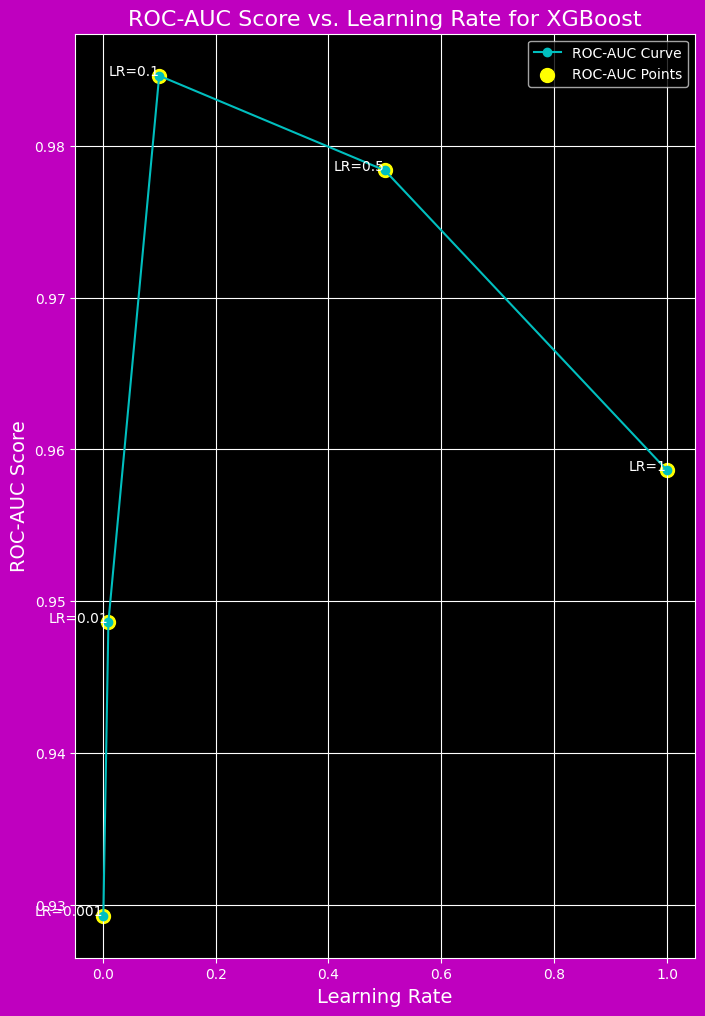





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9293000893254546, 0.9486445966643814, 0.984612093683384, 0.9783772926582546, 0.9586362708999457]
Best Learning Rate : 0.1
Best Mean ROC-AUC score for val data: 0.984612093683384
Mean precision val score for best C 0.9168346318146203
Mean recall val score for best C 0.7766790037782404
Mean f1 val score for best C 0.8402065614716365




In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs learning_rate
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-', label='ROC-AUC Curve')  # Line plot
    plt.scatter(learning_rate_values, mean_roc_auc_scores_val, color='yellow', s=100, label='ROC-AUC Points')  # Add points

    # Add labels for each point (show both learning_rate and ROC-AUC)
    for i, (lr, auc) in enumerate(zip(learning_rate_values, mean_roc_auc_scores_val)):
        plt.text(lr, auc, f"LR={lr}", fontsize=10, ha='right', color='white')  # Display learning_rate and ROC-AUC

    plt.xlabel('Learning Rate', fontsize=14)
    plt.ylabel('ROC-AUC Score', fontsize=14)
    plt.title('ROC-AUC Score vs. Learning Rate for XGBoost', fontsize=16)
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

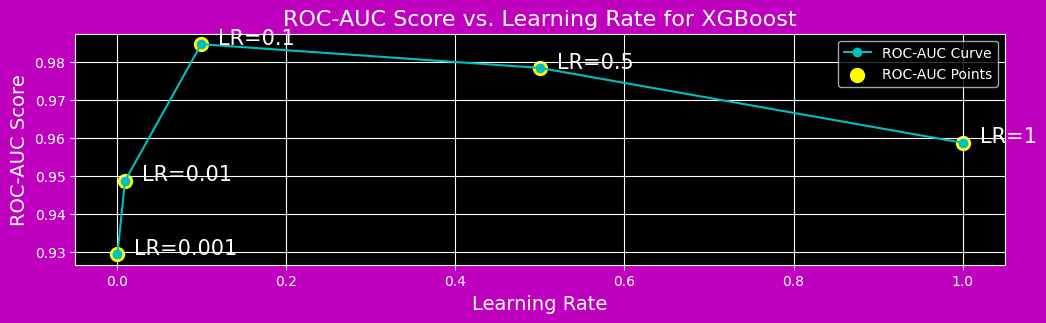

In [31]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 5), facecolor='m')

    # Plot ROC-AUC scores vs learning_rate
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-', label='ROC-AUC Curve')  # Line plot
    plt.scatter(learning_rate_values, mean_roc_auc_scores_val, color='yellow', s=100, label='ROC-AUC Points')  # Add points

    # Add labels for each point (show both learning_rate and ROC-AUC)
    for i, (lr, auc) in enumerate(zip(learning_rate_values, mean_roc_auc_scores_val)):
        plt.text(lr + 0.02, auc, f"LR={lr}", fontsize=15, ha='left', color='white')  # Shift text to the right

    plt.xlabel('Learning Rate', fontsize=14)
    plt.ylabel('ROC-AUC Score', fontsize=14)
    plt.title('ROC-AUC Score vs. Learning Rate for XGBoost', fontsize=16)
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 45.40 seconds
Best ROC AUC score:  0.9837249007934156
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}


In [21]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9837249007934156
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9833786203801483
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9827942418709767
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9810847166647876
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9807792945330731
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9796346270158716
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.9814724869252762
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9791171774325869
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9778991506644884

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate': 

In [22]:
best_model = model_GridSearch.best_estimator_

In [24]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Calculate the ROC-AUC score
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)

# Calculate other metrics using binary predictions
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)

print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Test ROC-AUC Score: 0.9737071372583923
Test F1 Score: 0.8404255319148936
Test Precision: 0.8777777777777778
Test Recall: 0.8061224489795918


In [88]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict binary outcomes based on the threshold (default 0.5)
y_test_pred_binary = (y_test_pred_proba >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_pt, y_test_pred_binary)


# Labeling the elements of the confusion matrix
tn, fp, fn, tp = cm.ravel()  # Unpacking the confusion matrix

print("\nConfusion matrix:")
print(f"True Negatives (TN): {tn}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")





Confusion matrix:
True Negatives (TN): 56853
True Positives (TP): 79
False Positives (FP): 11
False Negatives (FN): 19


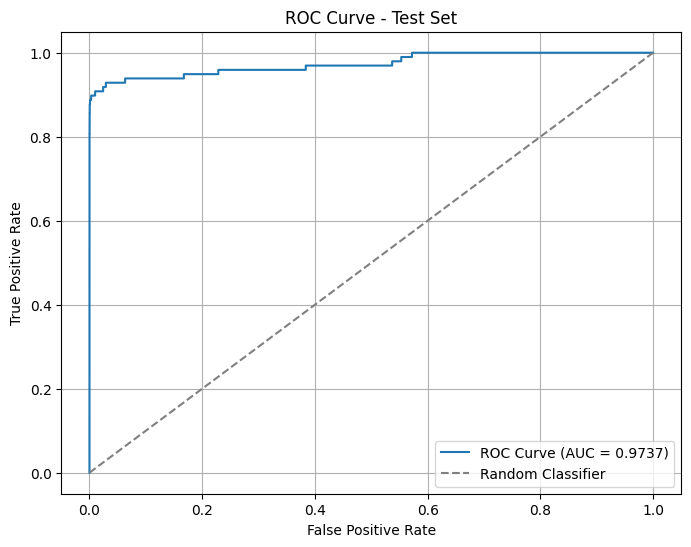

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_pt, y_test_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [59]:
# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

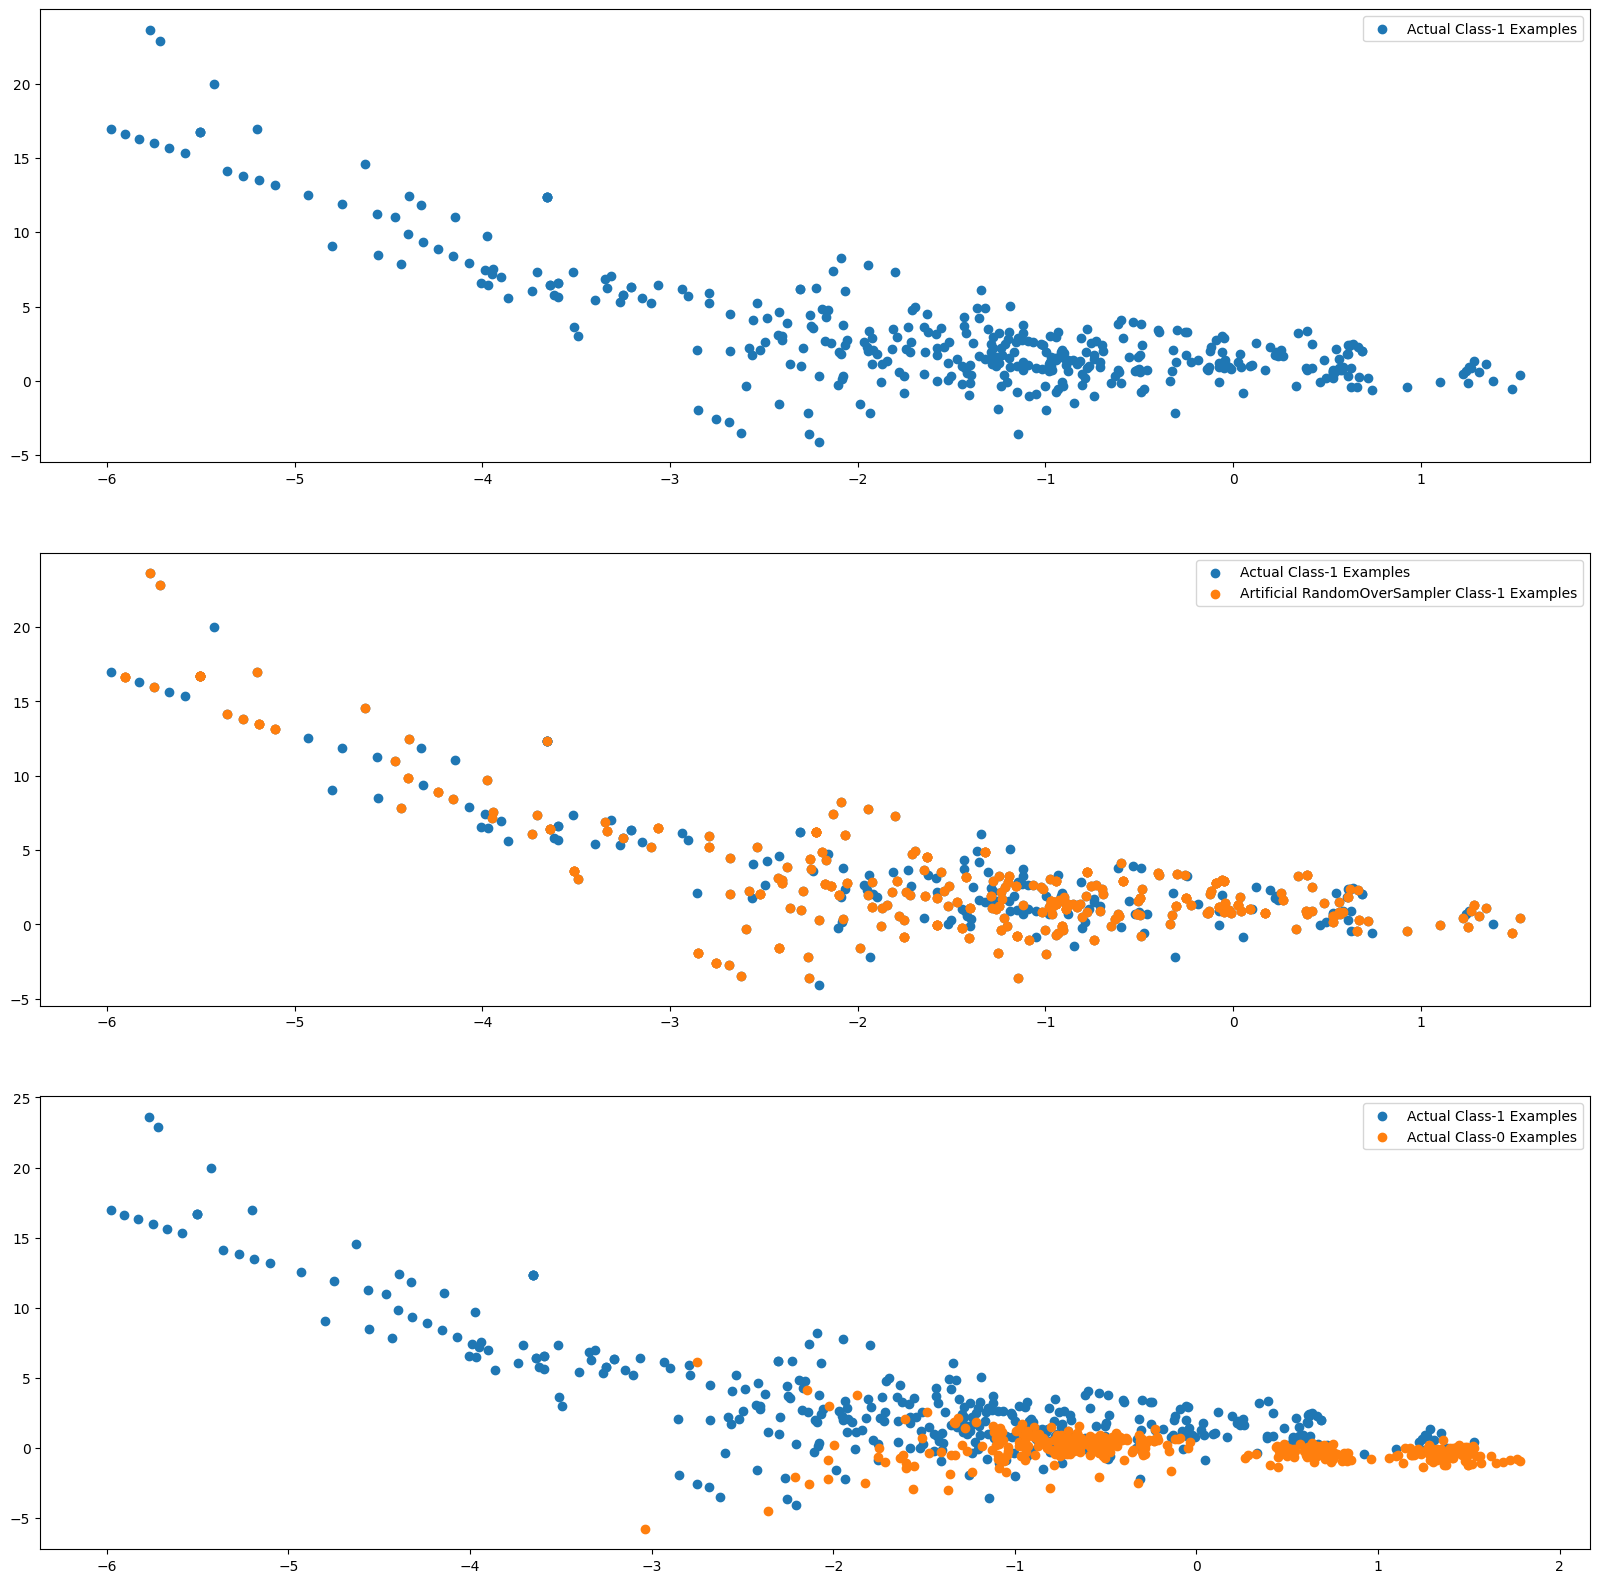

In [60]:
# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [61]:
print(y_ros_train_pt.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

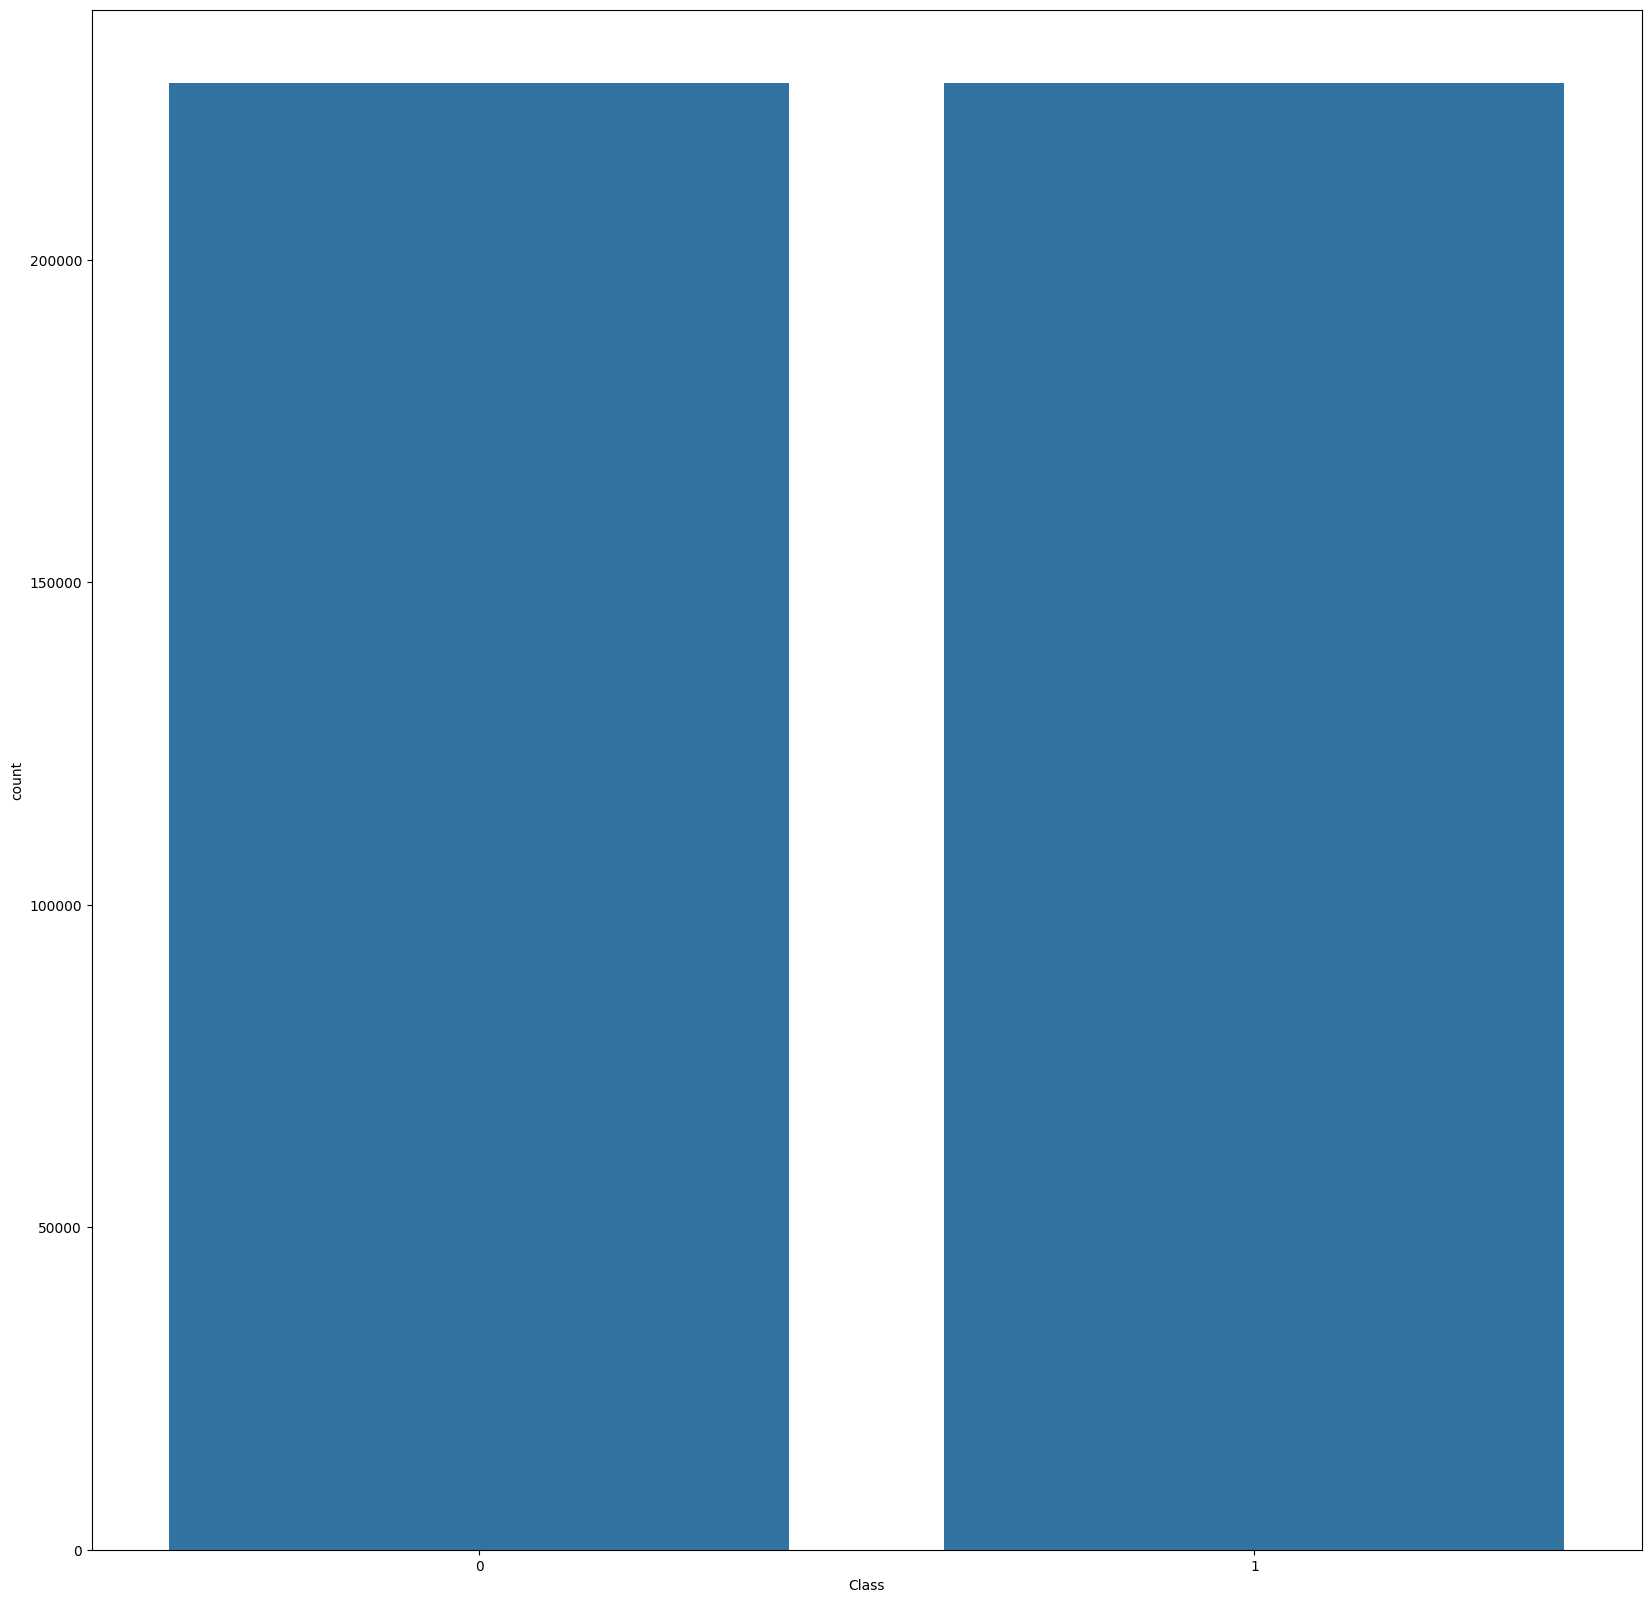

In [62]:
sns.countplot(x=y_ros_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.89000e+03, 8.64000e+03, 1.93390e+04,
        2.41990e+04, 7.23550e+04, 1.64576e+05, 9.98080e+04, 5.90810e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

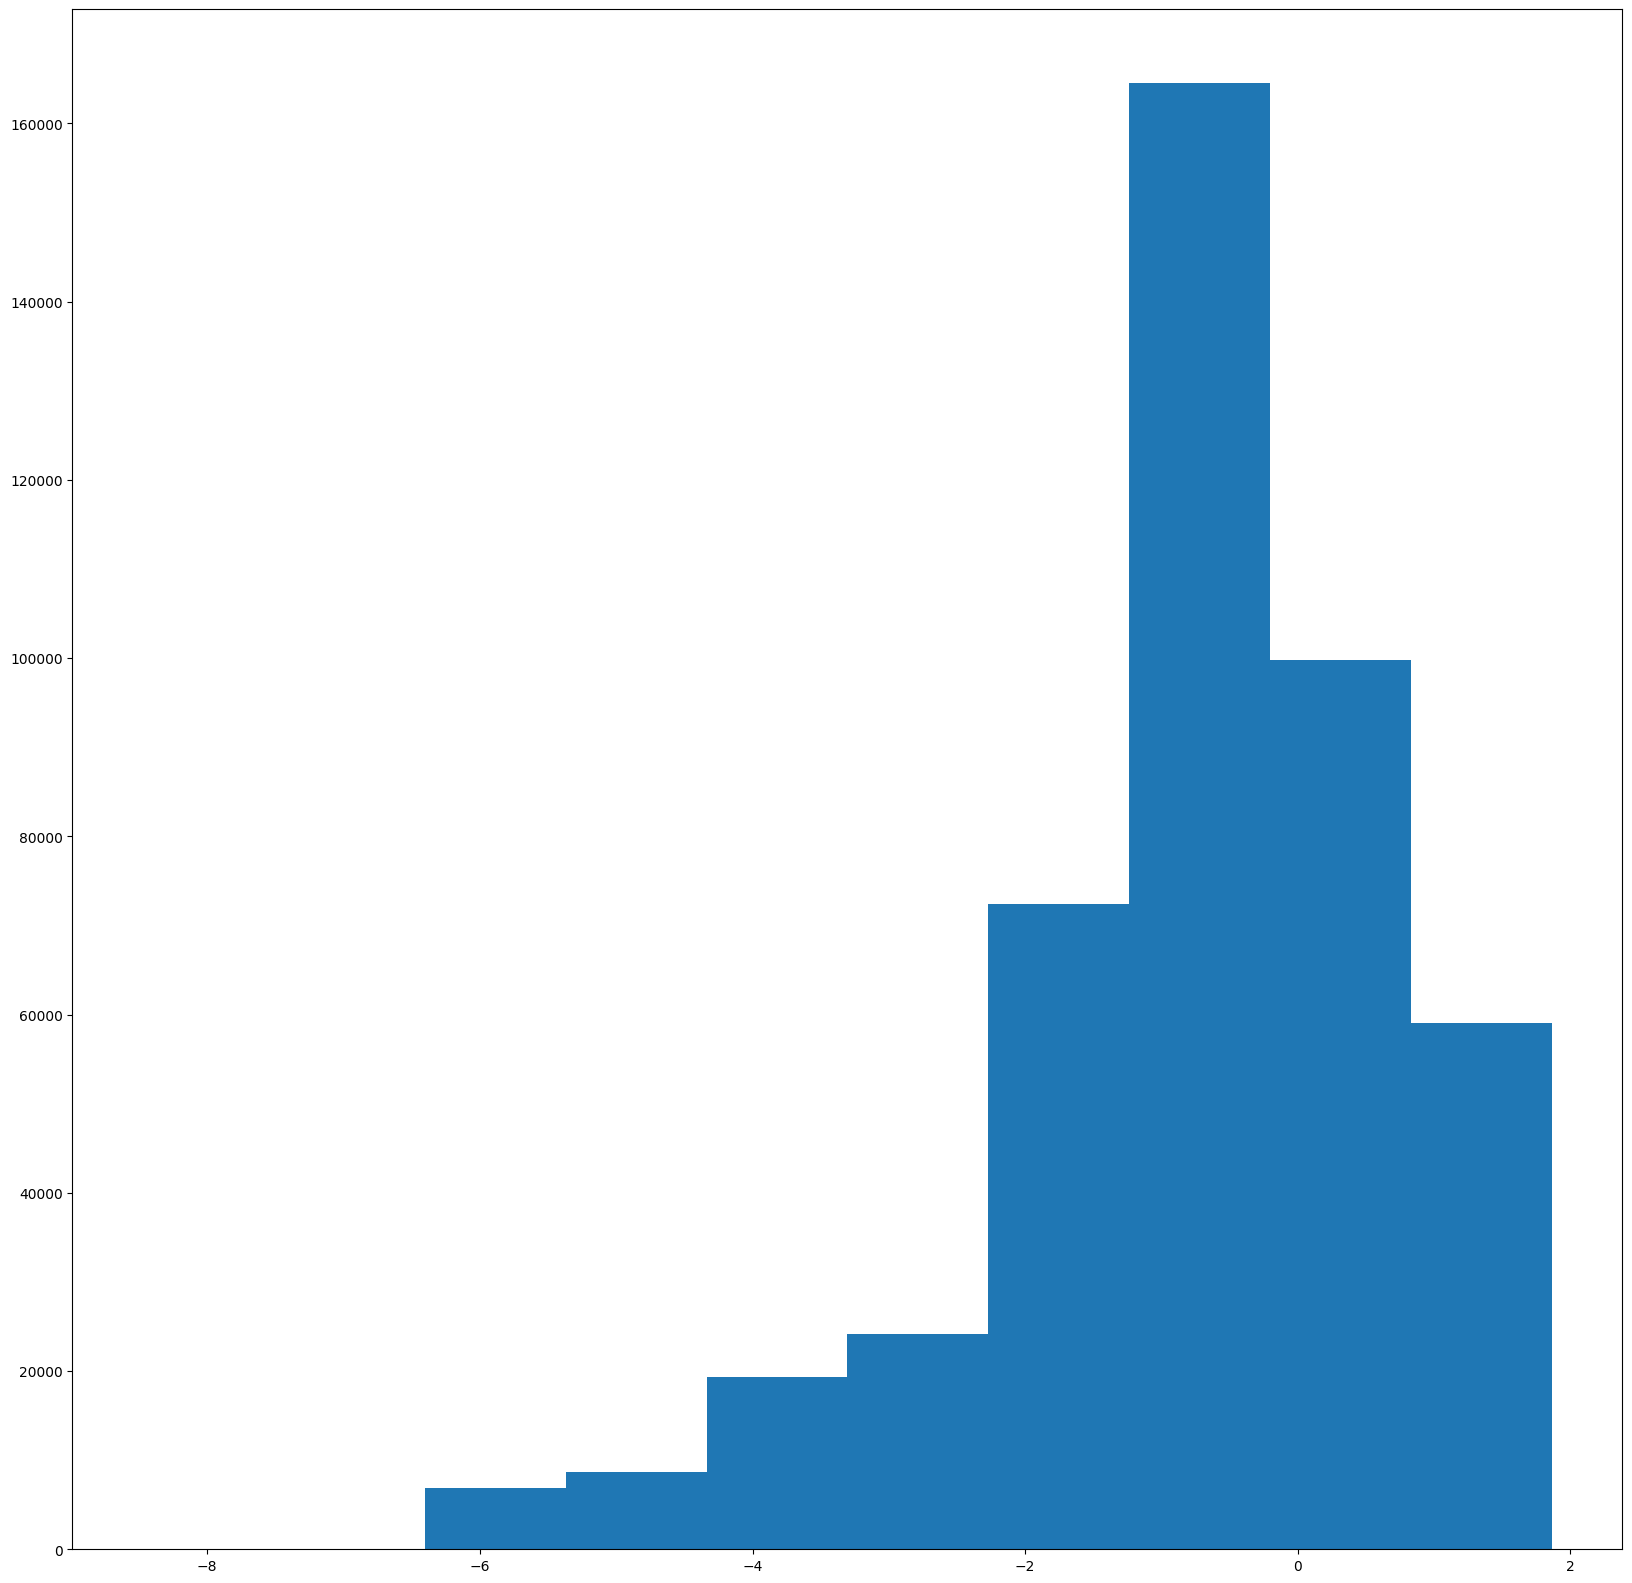

In [63]:
plt.hist(X_ros_train_pt[:,0])

==================================XGBoost Classifier using ROS:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 2.6748931407928467 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 3.181082010269165 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 2.7274105548858643 seconds
ROC-AUC Score for val data = 0.9804421365031618
Mean precision val score: 0.9726448178083577
Mean recall val score: 0.9212753516141938
Mean f1 val score: 0.9462481122402351
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed

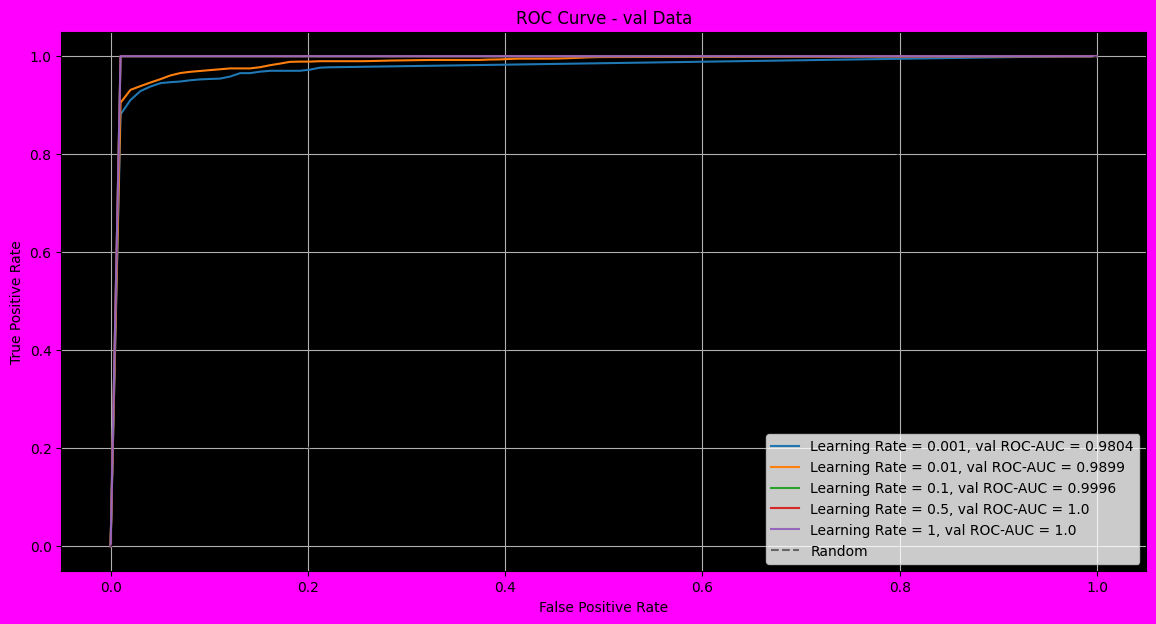

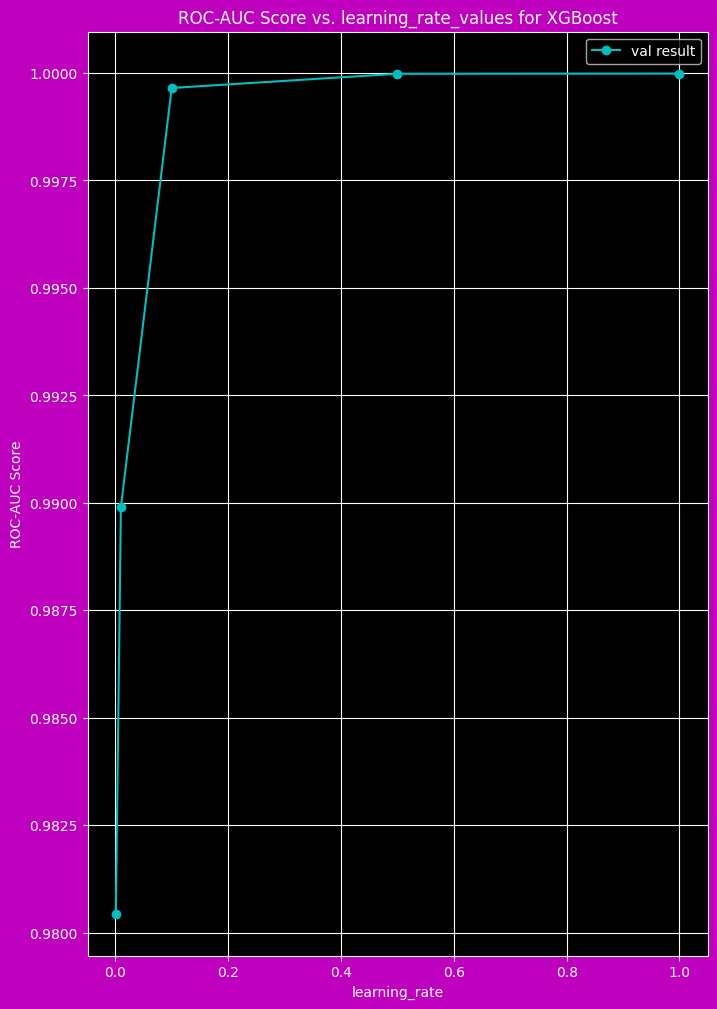





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9804421365031618, 0.9899008279909806, 0.9996493560533288, 0.9999799590336389, 0.9999844340730837]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.9999844340730837
Mean precision val score for best Learning Rate: 0.9997187046558644
Mean recall val score for best Learning Rate: 1.0
Mean f1 val score for best Learning Rate: 0.999859331345707




In [64]:
print("============================================================================================================")

print("==================================XGBoost Classifier using ROS:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [65]:
params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 192.21 seconds
Best ROC AUC score:  0.9999932445724712
Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9}


In [66]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5} 0.9999834405476976
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.7} 0.9999780454549185
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.9} 0.9999806408971917
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.5} 0.9999887465403915
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7} 0.9999893852601348
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9} 0.9999932445724712
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.5} 0.9999911468207149
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.7} 0.9999887696779991
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.9} 0.999992045331139
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.5} 0.9999834123650478
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.7} 0.9999896914999975
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.9} 0.9999884362992887
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.5} 0.999987721382

In [67]:
# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)


In [68]:
print(y_smote_train_pt.value_counts())
print("======================================")
print(y_train.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64


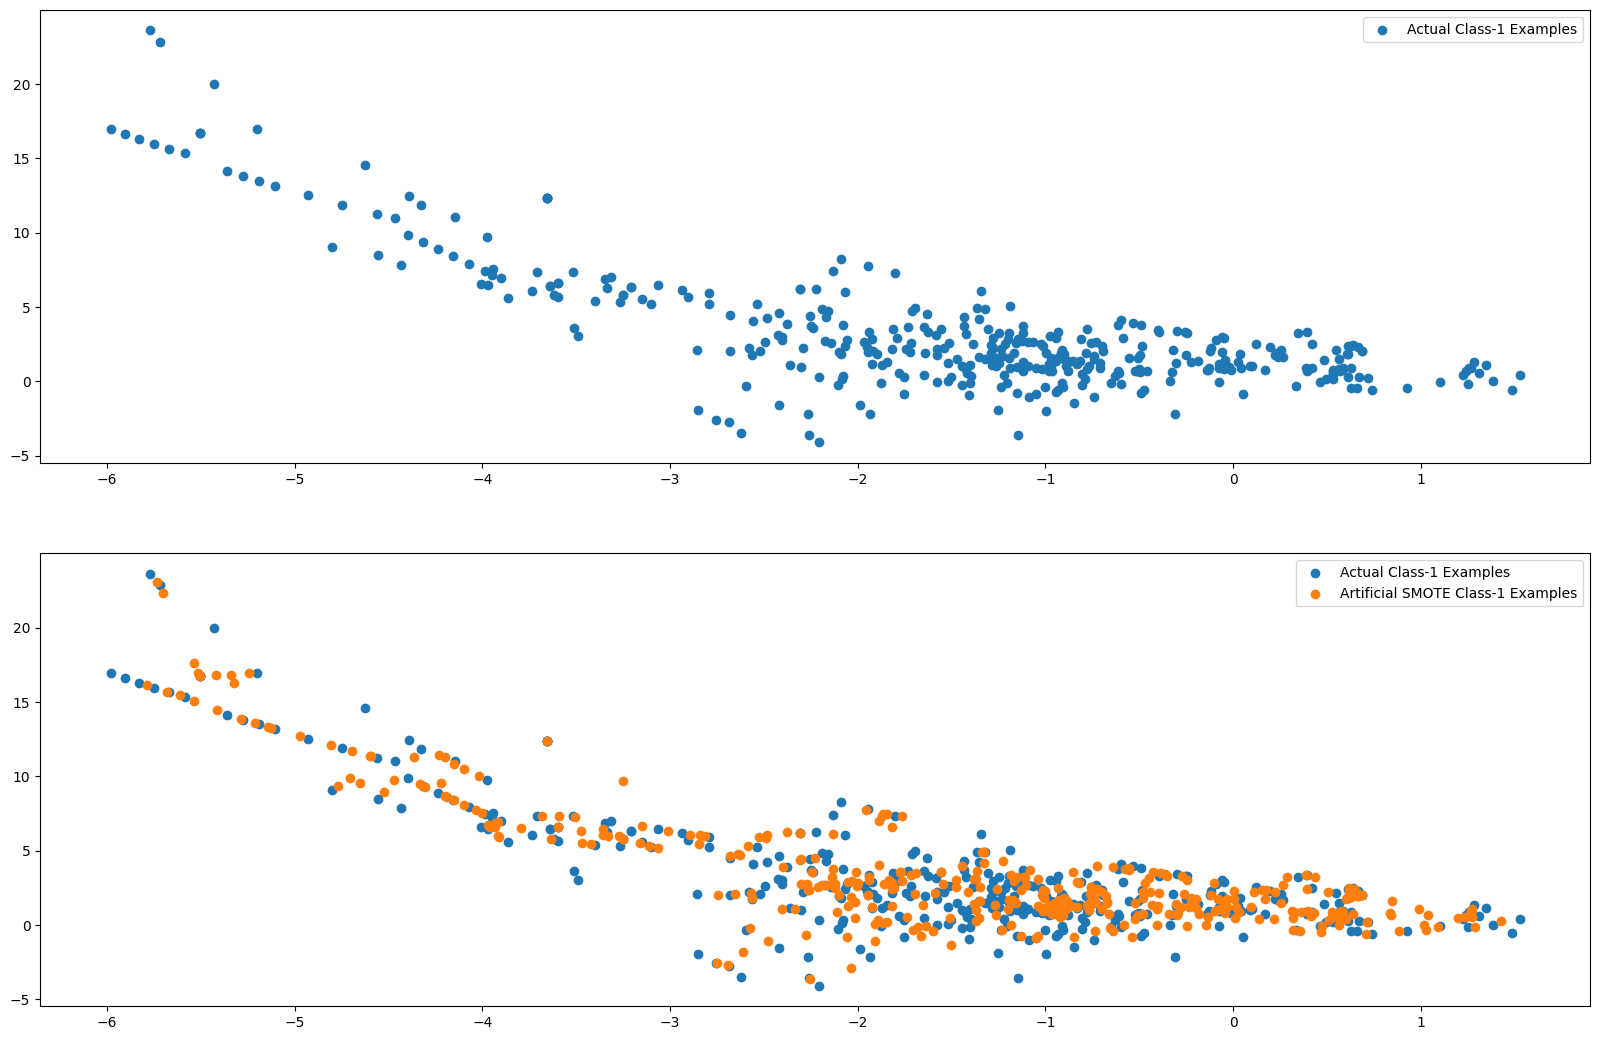

In [69]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()

In [70]:
print(y_smote_train_pt.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


(array([2.00000e+00, 1.20000e+01, 6.48400e+03, 8.61800e+03, 1.85730e+04,
        2.23130e+04, 6.63820e+04, 1.69144e+05, 1.04130e+05, 5.92440e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

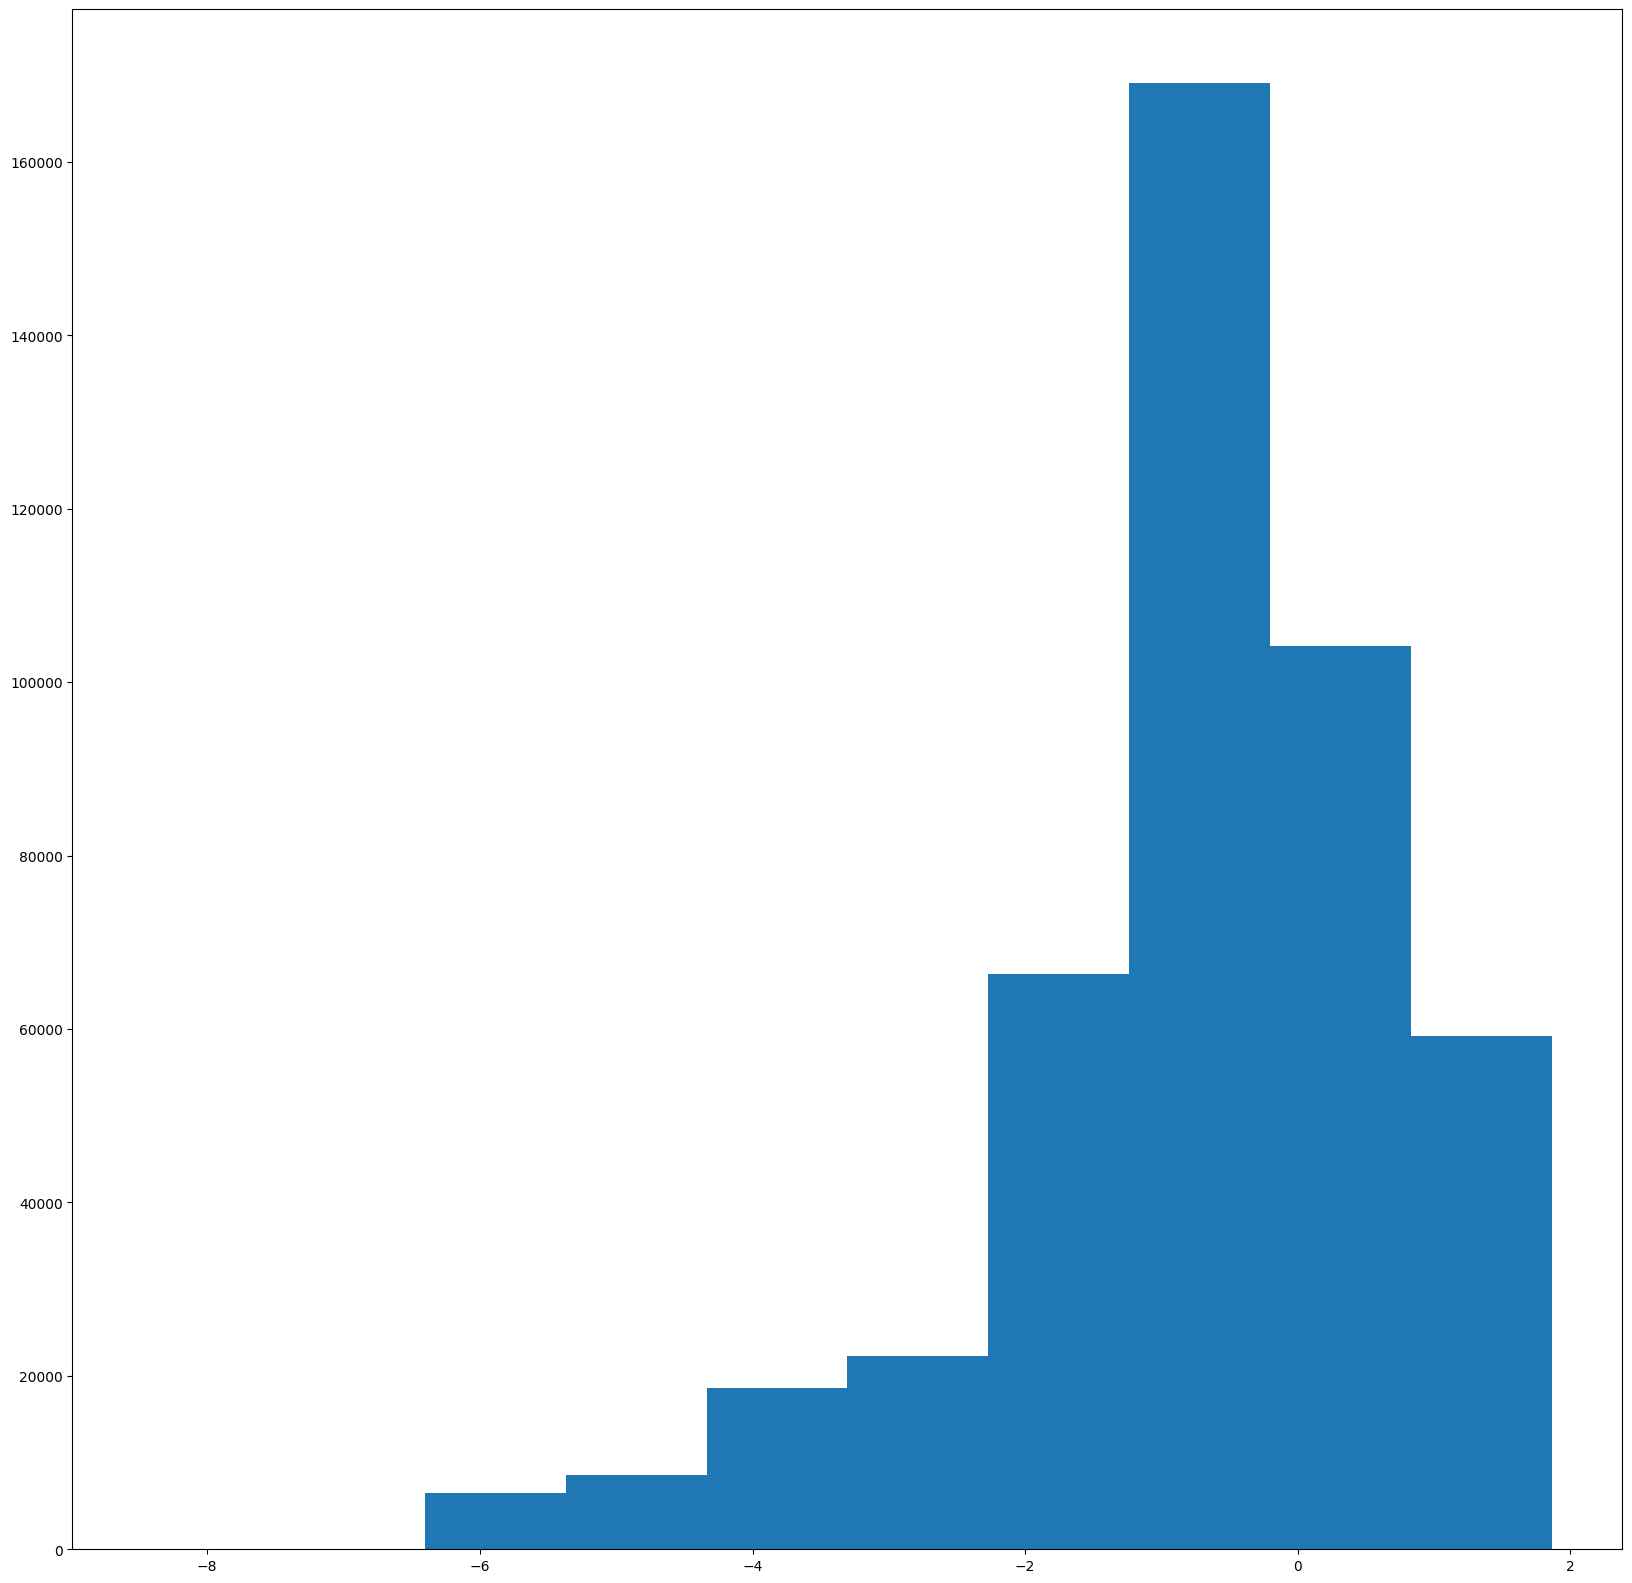

In [71]:
plt.hist(X_smote_train_pt[:,0])

================================XGBoost Classifier using SMOTE:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 3.1591267585754395 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 2.9170033931732178 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 2.947514295578003 seconds
ROC-AUC Score for val data = 0.984141522131378
Mean precision val score: 0.9819327366388713
Mean recall val score: 0.8923548368659624
Mean f1 val score: 0.9350022066963856
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed:

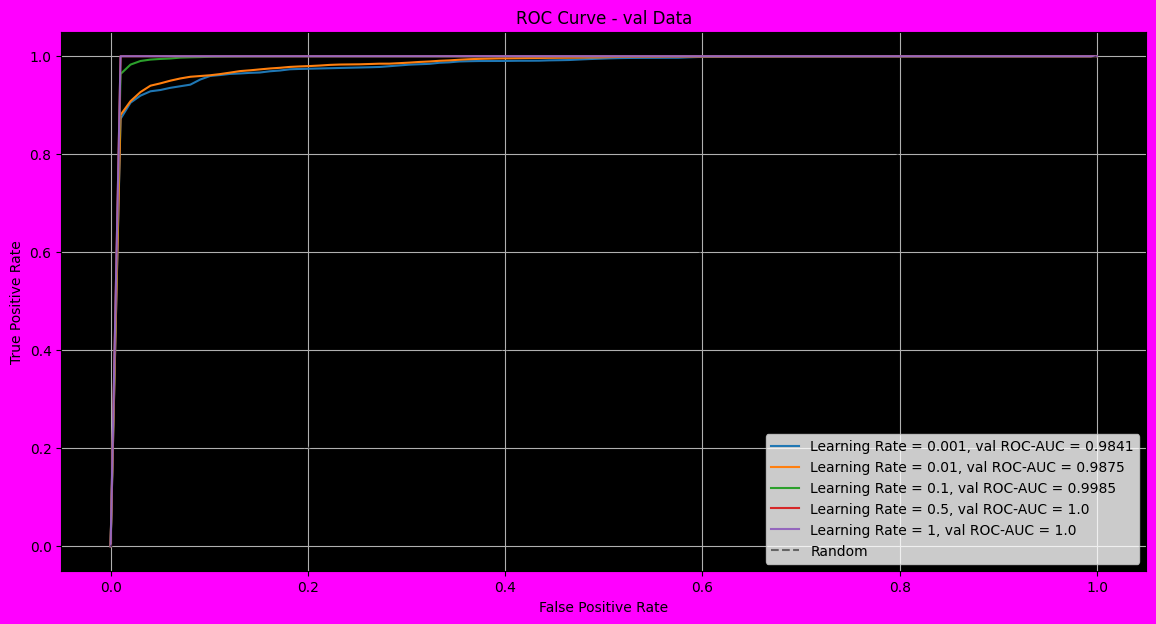

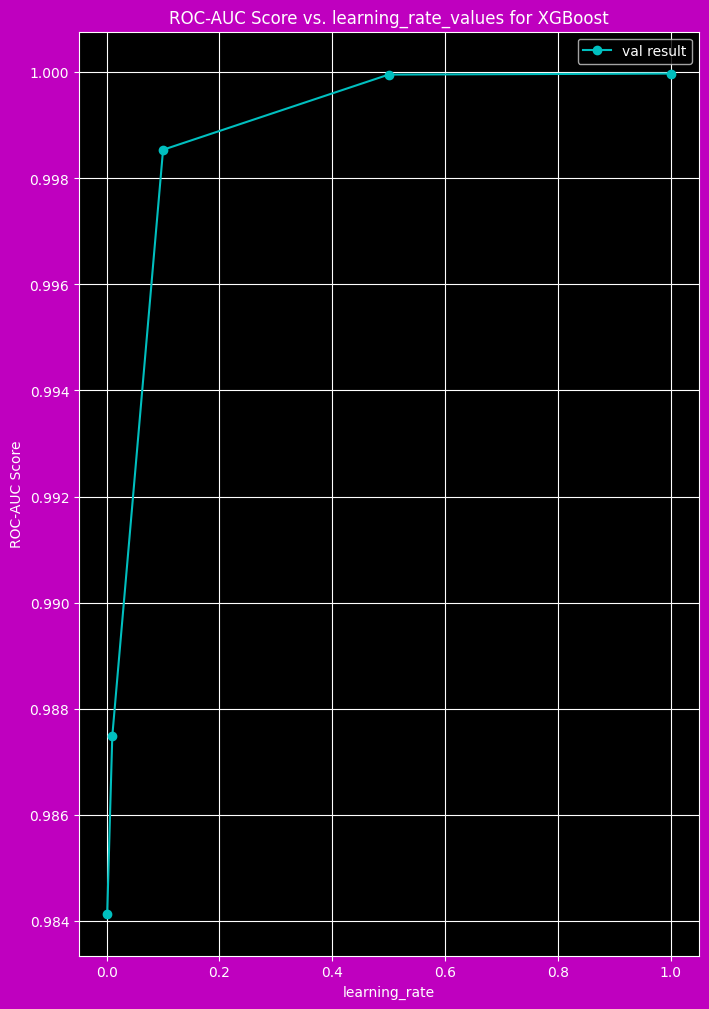





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.984141522131378, 0.9874860183518942, 0.9985370592971776, 0.9999541178634064, 0.999972897627198]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.999972897627198
Mean precision val score for best Learning Rate: 0.9987047518982749
Mean recall val score for best Learning Rate: 1.0
Mean f1 val score for best Learning Rate: 0.9993519426125479




In [72]:
print("============================================================================================================")

print("================================XGBoost Classifier using SMOTE:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [73]:
params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 195.31 seconds
Best ROC AUC score:  0.9999900656739632
Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}


In [74]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9999677782430778
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9999709321193361
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9999696745120842
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9999872851888191
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9999866170976515
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9999893289238301
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9999862667571612
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9999867969795021
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9999900656739632
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.999969744823736
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9999734587576713
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9999679986302388
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9999853958205024
{'l